In [1]:
import pandas as pd
import numpy as np

In [3]:
# Import the dataset
autos1 = pd.read_csv(r"D:\BUSINESS ANALYTICS MASTER\AY 20-21 - Term IV - MLAP\MLAP - PYTHON\Getting Started with Python\Auto.csv")

In [8]:
autos = pd.read_csv(r"Auto.csv") # From mthe Working Directory

In [9]:
autos.head( 5 ) # first 5 rows of variables and Data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:
# ORIGIN: 1- US, 2 - Europe and 3 - Japan

In [11]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [12]:
autos[["mpg", "displacement","horsepower","weight","acceleration"]].describe()

,mpg,displacement,weight,acceleration
count,397.000000,397.000000,397.000000,397.000000
mean,23.515869,193.532746,2970.261965,15.555668
std,7.825804,104.379583,847.904119,2.749995
min,9.000000,68.000000,1613.000000,8.000000
25%,17.500000,104.000000,2223.000000,13.800000
50%,23.000000,146.000000,2800.000000,15.500000
75%,29.000000,262.000000,3609.000000,17.100000
max,46.600000,455.000000,5140.000000,24.800000


In [13]:
# Horsepower is not an "object" data type. We need to convert into "Numeric"
autos["horsepower"].isnull().values.any() # Missing value? wrt horsepower

False

In [17]:
autos["horsepower"] = pd.to_numeric( autos["horsepower"], errors = 'coerce')
# Point to Ponder (1) : errors = 'corece'

In [18]:
autos = autos.dropna()

In [19]:
autos[["mpg", "displacement","horsepower","weight","acceleration"]].describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


In [20]:
# %matplotlib inline is a directive to the ipython notebook to render the plots here.
get_ipython().magic('matplotlib inline') # Point to ponder (2)
import seaborn as sn
import matplotlib.pyplot as plt

In [21]:
mpg_cylinders_df = autos.groupby('cylinders')['mpg'].mean().reset_index()

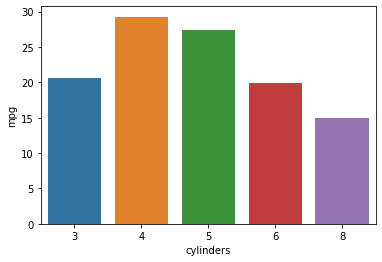

In [22]:
sn.barplot( y = 'mpg',
          x = 'cylinders',
          data = mpg_cylinders_df )

In [23]:
# INSIGHT : Vehicles with 4 cylinders seems to give more mileage

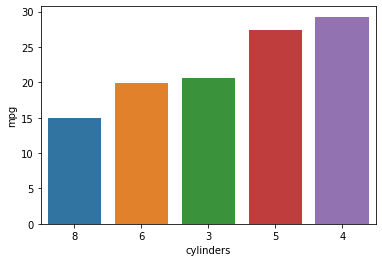

In [24]:
sn.barplot( y = 'mpg',
          x = 'cylinders',
          data = mpg_cylinders_df,
          order = mpg_cylinders_df.sort_values('mpg')['cylinders'])

In [25]:
mpg_cylinders_origin_df = autos.groupby(['cylinders', 'origin'])['mpg'].mean().reset_index()

In [26]:
mpg_cylinders_origin_df

,cylinders,origin,mpg
0,3,3,20.550000
1,4,1,28.013043
2,4,2,28.106557
3,4,3,31.595652
4,5,2,27.366667
5,6,1,19.645205
6,6,2,20.100000
7,6,3,23.883333
8,8,1,14.963107


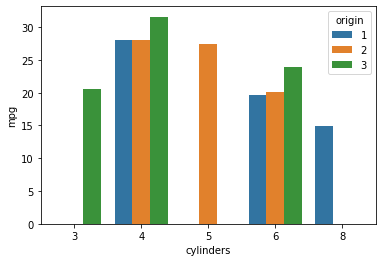

In [27]:
sn.barplot( y = 'mpg',
          x = 'cylinders',
          data = mpg_cylinders_origin_df,
          hue = 'origin');

In [28]:
# INSIGHT : MPG - Japan. Speed(cyclinders) - US

In [29]:
mpg_year_origin_df = autos.groupby(['year', 'origin'])['mpg'].mean().reset_index()

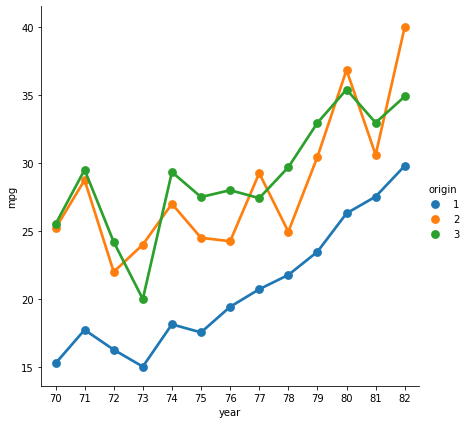

In [33]:
sn.catplot( x = 'year', y = 'mpg', hue = 'origin', kind = 'point', data = mpg_year_origin_df, height = 6 )
# hue - color

In [34]:
# INSIGHT - MGP over the year. Europe tops ythe list interms of MPG, followed by Japan.

In [35]:
from scipy import stats

In [36]:
stats.ttest_ind( autos[ autos.origin == 1]["mpg"],
              autos[ autos.origin == 3 ]["mpg"],
              equal_var=True)

Ttest_indResult(statistic=-12.664889006229084, pvalue=4.17283714676552e-30)

In [ ]:
# MGp - US VS Japan. average is significantly difference. Alpha = 0.01. 
# Ho : Mean mpg for US = Mean Mpg for Japan
# p = 4.17 e-30
# PLAN- r : P-Value Less Than Alpha Value - Reject Null Hypothesis.
# Inference : REJECT Ho -- there is siginificant differenvce. between mpg for the vehicles manufacture by US and Japan.